In [20]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

## Чистка данных, работа с категориальными признаками

In [21]:
data_train = pd.read_csv("pass_satisfaction_train.csv")
data_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             239
satisfaction                           0
dtype: int64

In [22]:
data_train.fillna(value=0, inplace=True)
data_train.drop(columns=["id"], inplace=True)
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
1,0,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
2,0,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
3,1,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
4,0,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied


In [23]:
category_features = data_train.select_dtypes('object')
for col in category_features.columns:
    print(category_features[col].value_counts())

Loyal Customer       67999
disloyal Customer    15124
Name: Customer Type, dtype: int64
Business travel    57305
Personal Travel    25818
Name: Type of Travel, dtype: int64
Business    39701
Eco         37447
Eco Plus     5975
Name: Class, dtype: int64
neutral or dissatisfied    47168
satisfied                  35955
Name: satisfaction, dtype: int64


In [24]:
data_train["Customer Type"] = data_train["Customer Type"].map({"Loyal Customer": 0, "disloyal Customer": 1})
data_train["Type of Travel"] = data_train["Type of Travel"].map({"Business travel": 0, "Personal Travel": 1})
data_train["Class"] = data_train["Class"].map({"Business": 0, "Eco": 1, "Eco Plus": 2})
data_train["satisfaction"] = data_train["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})

# data_train = pd.get_dummies(data_train, columns=["Customer Type", "Type of Travel", "Class", "satisfaction"])

## Матрица корреляции

<AxesSubplot: >

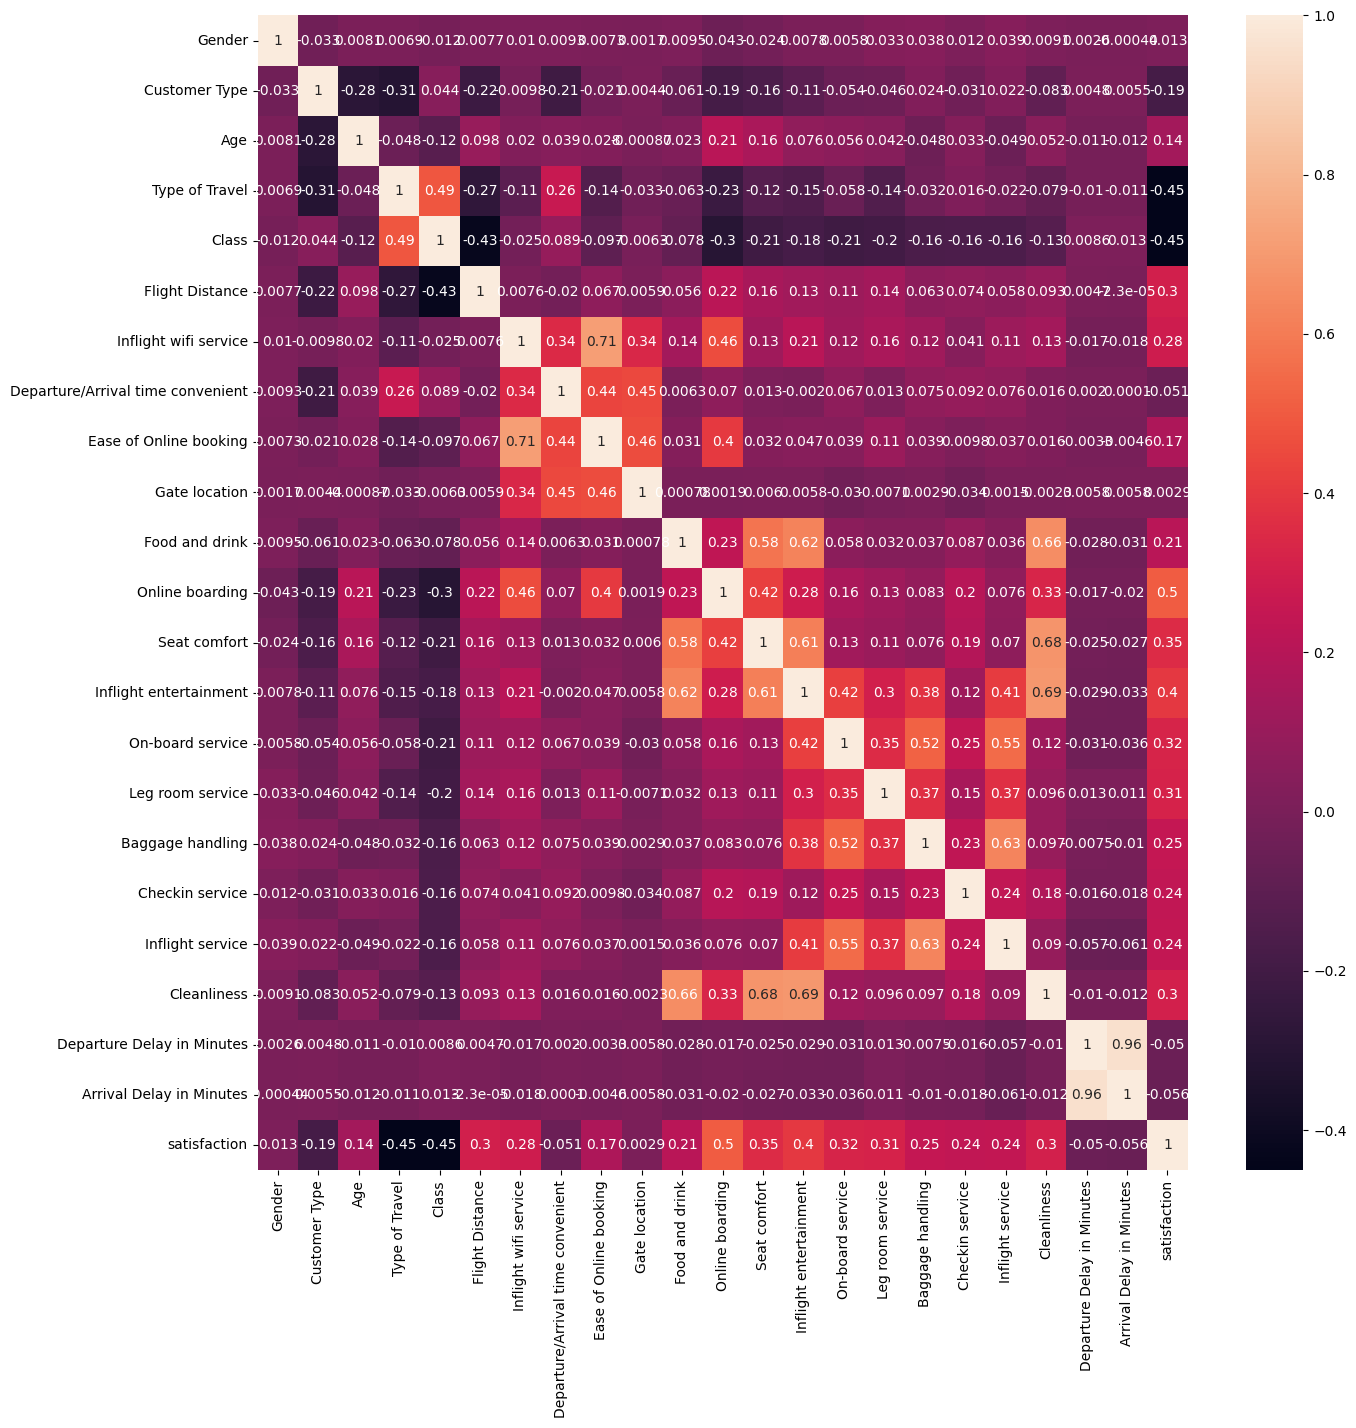

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_train.corr(), annot=True)

Выкидываем те признаки, которые ни с кем не коррелируют.<br>
Те же, что, наоборот, имеют коэффициент выше, перемножаем между собой.

In [26]:
data_train.drop(columns=["Age", "Flight Distance", "Customer Type"], inplace=True)

data_train["Wifi"] = data_train["Inflight wifi service"] * data_train["Ease of Online booking"]
data_train["Delay"] = data_train["Departure Delay in Minutes"] * data_train["Arrival Delay in Minutes"]
data_train["Clean and food"] = data_train["Cleanliness"] * data_train["Food and drink"]
data_train["Clean and seat"] = data_train["Cleanliness"] * data_train["Seat comfort"]
data_train["Clean and entertainment"] = data_train["Cleanliness"] * data_train["Inflight entertainment"]

## Масштабирование данных

In [27]:
X, y = data_train.drop(columns=["satisfaction"]), data_train["satisfaction"]

reg = LogisticRegression()
scaler = StandardScaler()

In [28]:
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=41)

reg = reg.fit(X_train, y_train)

In [29]:
y_pred = reg.predict(X_test)
f1_score(y_test, y_pred)

0.8682994135908934

In [30]:
reg = reg.fit(X_std, y)

## Test data

Чистим данные, работаем с категориальными признаками

In [31]:
data_test = pd.read_csv("pass_satisfaction_test.csv")
data_test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             71
dtype: int64

In [32]:
data_test.fillna(value=0, inplace=True)
ids = data_test["id"]
data_test.drop(columns=["id"], inplace=True)

In [33]:
data_test["Customer Type"] = data_test["Customer Type"].map({"Loyal Customer": 0, "disloyal Customer": 1})
data_test["Type of Travel"] = data_test["Type of Travel"].map({"Business travel": 0, "Personal Travel": 1})
data_test["Class"] = data_test["Class"].map({"Business": 0, "Eco": 1, "Eco Plus": 2})
data_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,15,1,1,590,2,5,3,3,...,3,3,4,3,4,5,5,3,32,42.0
1,0,0,23,0,2,488,4,5,5,5,...,4,4,5,4,1,5,1,4,0,62.0
2,0,1,25,0,0,528,1,4,2,1,...,5,5,4,4,5,4,4,5,0,0.0
3,0,0,15,0,1,369,0,4,0,3,...,2,2,2,3,5,2,5,2,0,0.0
4,0,0,34,0,0,604,1,1,1,1,...,5,4,4,4,4,4,4,3,0,0.0


In [34]:
data_test.drop(columns=["Age", "Flight Distance", "Customer Type"], inplace=True)

data_test["Wifi"] = data_test["Inflight wifi service"] * data_test["Ease of Online booking"]
data_test["Delay"] = data_test["Departure Delay in Minutes"] * data_test["Arrival Delay in Minutes"]
data_test["Clean and food"] = data_test["Cleanliness"] * data_test["Food and drink"]
data_test["Clean and seat"] = data_test["Cleanliness"] * data_test["Seat comfort"]
data_test["Clean and entertainment"] = data_test["Cleanliness"] * data_test["Inflight entertainment"]

In [35]:
data_test_std = scaler.fit_transform(data_test)

## Predict

In [36]:
pred = reg.predict(data_test_std)

ans = pd.DataFrame({"id": ids, "satisfaction": ['satisfied' if p else 'neutral or dissatisfied' for p in pred]})
ans.to_csv("answer.csv", sep=',', index=False)